<a href="https://colab.research.google.com/github/iamvinay1/codeclause_mask_detection/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip  install kaggle

configure the path of kaggle.json file


In [21]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face mask dataset**

In [22]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:05<00:00, 41.8MB/s]
100% 163M/163M [00:05<00:00, 33.0MB/s]


In [23]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


# New section

In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [24]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_647.jpg', 'with_mask_3631.jpg', 'with_mask_2464.jpg', 'with_mask_1014.jpg', 'with_mask_3155.jpg']
['with_mask_3217.jpg', 'with_mask_2542.jpg', 'with_mask_3304.jpg', 'with_mask_1856.jpg', 'with_mask_2869.jpg']


In [38]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3261.jpg', 'without_mask_539.jpg', 'without_mask_3007.jpg', 'without_mask_317.jpg', 'without_mask_1033.jpg']
['without_mask_2937.jpg', 'without_mask_3255.jpg', 'without_mask_1167.jpg', 'without_mask_2616.jpg', 'without_mask_2004.jpg']


In [39]:
print('No. of with mask images:',len(with_mask_files))
print('No. of without mask images:',len(without_mask_files))

No. of with mask images: 3725
No. of without mask images: 3828


**Creating labels for two class of images**

with mask-->1

without mask-->0

In [40]:
#create the label
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels [0:5])
print(without_mask_labels [0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

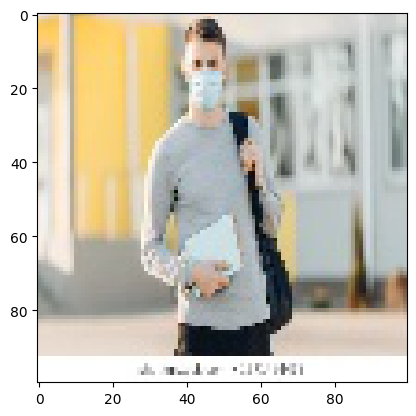

In [25]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3631.jpg')
imgplot = plt.imshow(img)
plt.show()

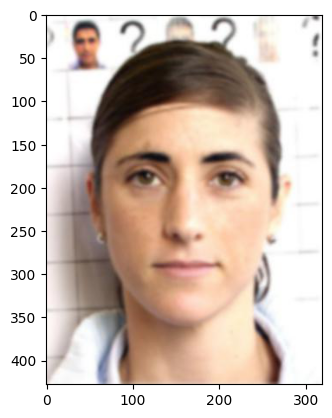

In [26]:
# displaying without mask image
img =  mpimg.imread('/content/data/without_mask/without_mask_1167.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

Resize images and converting in numpy arrays.

In [41]:
# convert images to numpy array
with_mask_path ='/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [42]:
type(data)

list

In [44]:
len(data)

7553

In [45]:
data[0]

array([[[77, 62, 65],
        [76, 61, 66],
        [80, 65, 70],
        ...,
        [91, 73, 79],
        [93, 73, 79],
        [88, 69, 75]],

       [[72, 57, 60],
        [76, 61, 65],
        [75, 61, 66],
        ...,
        [87, 70, 75],
        [87, 68, 74],
        [83, 65, 71]],

       [[73, 58, 61],
        [74, 60, 65],
        [69, 57, 61],
        ...,
        [85, 69, 76],
        [83, 66, 73],
        [81, 64, 70]],

       ...,

       [[83, 72, 68],
        [88, 77, 72],
        [93, 82, 76],
        ...,
        [19, 17, 18],
        [20, 18, 19],
        [21, 19, 20]],

       [[80, 70, 64],
        [86, 77, 70],
        [91, 81, 74],
        ...,
        [21, 19, 20],
        [21, 19, 20],
        [23, 21, 22]],

       [[77, 70, 62],
        [84, 76, 68],
        [90, 81, 72],
        ...,
        [21, 19, 20],
        [21, 19, 20],
        [23, 21, 22]]], dtype=uint8)

In [48]:
type(data[0])

numpy.ndarray

In [52]:
data[0].shape

(128, 128, 3)

In [54]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [55]:
type(X)

numpy.ndarray

In [56]:
type(Y)

numpy.ndarray

In [57]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [58]:
print(Y)

[1 1 1 ... 0 0 0]


**Train test split**

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [61]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [62]:
X_train[0]

array([[[191, 193, 190],
        [191, 193, 190],
        [191, 193, 190],
        ...,
        [196, 196, 196],
        [194, 195, 195],
        [192, 194, 193]],

       [[191, 193, 190],
        [191, 193, 190],
        [191, 193, 190],
        ...,
        [196, 196, 196],
        [194, 195, 195],
        [192, 194, 193]],

       [[191, 193, 190],
        [191, 193, 190],
        [191, 193, 190],
        ...,
        [196, 196, 196],
        [194, 195, 195],
        [192, 194, 193]],

       ...,

       [[120, 113, 103],
        [119, 112, 102],
        [118, 111, 101],
        ...,
        [202, 202, 202],
        [200, 200, 200],
        [199, 199, 199]],

       [[119, 112, 102],
        [118, 111, 101],
        [117, 110, 100],
        ...,
        [202, 202, 202],
        [200, 200, 200],
        [198, 198, 198]],

       [[118, 111, 101],
        [117, 110, 100],
        [116, 109,  99],
        ...,
        [201, 201, 201],
        [199, 199, 199],
        [198, 198, 198]]

In [63]:
X_train_scaled[0]

array([[[0.74901961, 0.75686275, 0.74509804],
        [0.74901961, 0.75686275, 0.74509804],
        [0.74901961, 0.75686275, 0.74509804],
        ...,
        [0.76862745, 0.76862745, 0.76862745],
        [0.76078431, 0.76470588, 0.76470588],
        [0.75294118, 0.76078431, 0.75686275]],

       [[0.74901961, 0.75686275, 0.74509804],
        [0.74901961, 0.75686275, 0.74509804],
        [0.74901961, 0.75686275, 0.74509804],
        ...,
        [0.76862745, 0.76862745, 0.76862745],
        [0.76078431, 0.76470588, 0.76470588],
        [0.75294118, 0.76078431, 0.75686275]],

       [[0.74901961, 0.75686275, 0.74509804],
        [0.74901961, 0.75686275, 0.74509804],
        [0.74901961, 0.75686275, 0.74509804],
        ...,
        [0.76862745, 0.76862745, 0.76862745],
        [0.76078431, 0.76470588, 0.76470588],
        [0.75294118, 0.76078431, 0.75686275]],

       ...,

       [[0.47058824, 0.44313725, 0.40392157],
        [0.46666667, 0.43921569, 0.4       ],
        [0.4627451 , 0

**Building a convolutional Nerural Network(CNN)**

In [64]:
import tensorflow as tf
from tensorflow import keras

In [65]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [66]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [67]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 175s 1s/step - loss: 0.4623 - acc: 0.7922 - val_loss: 0.2641 - val_acc: 0.8975
Epoch 2/5
170/170 [==============================] - 158s 929ms/step - loss: 0.2922 - acc: 0.8847 - val_loss: 0.2264 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 152s 893ms/step - loss: 0.2417 - acc: 0.9044 - val_loss: 0.2072 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 146s 860ms/step - loss: 0.1975 - acc: 0.9226 - val_loss: 0.2810 - val_acc: 0.8959
Epoch 5/5
170/170 [==============================] - 152s 890ms/step - loss: 0.1615 - acc: 0.9351 - val_loss: 0.2593 - val_acc: 0.9174


**Model Evaluation**

In [68]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 207ms/step - loss: 0.2382 - acc: 0.9166
Test Accuracy = 0.9166114926338196


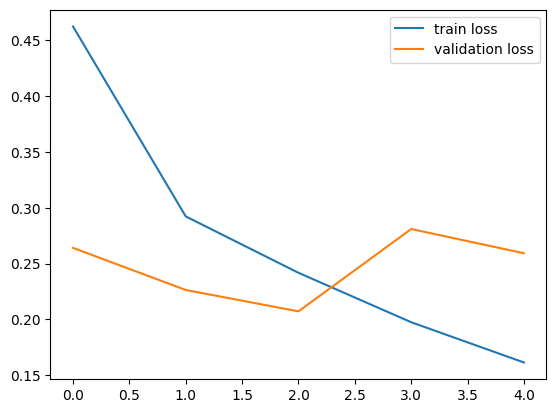

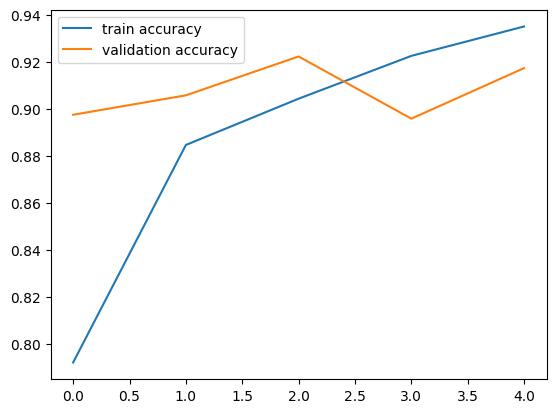

In [69]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Prediction System**

Path of the image to be predicted: /content/mask2.jpeg


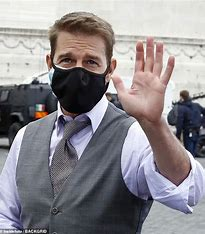

1/1 [==============================] - 0s 38ms/step
[[0.3326692  0.60775983]]
1
The person in the image is wearing a mask


In [73]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/no mask.jpeg


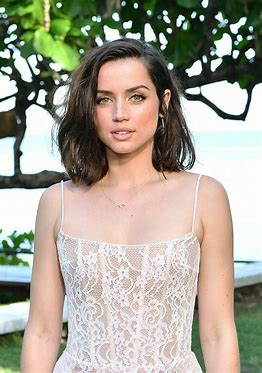

1/1 [==============================] - 0s 32ms/step
[[0.5923796  0.37589428]]
0
The person in the image is not wearing a mask


In [72]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')